In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Figure 3A

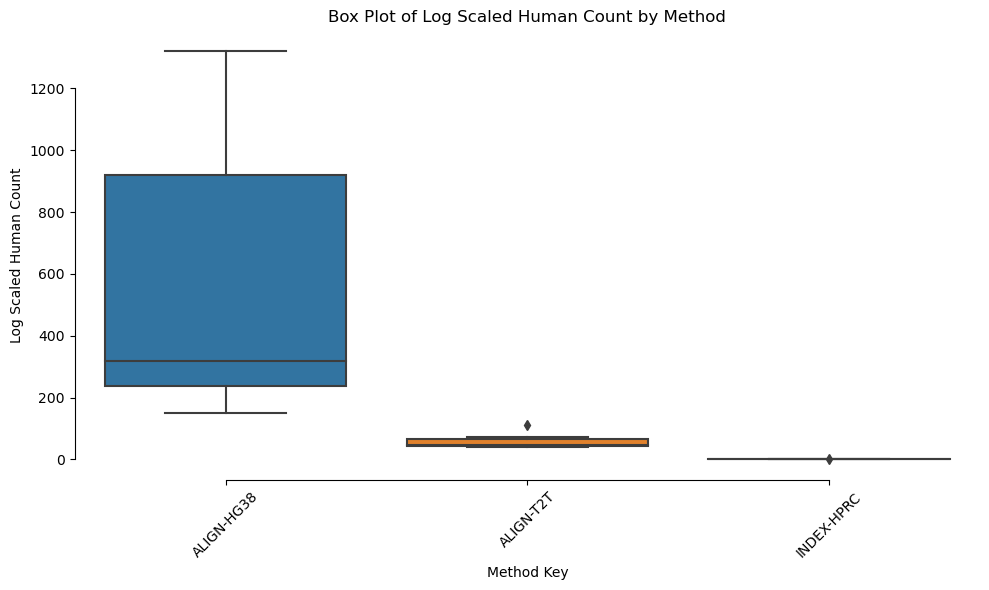

In [10]:
# List of file paths to your TSV files
file_paths = ['/panfs/cguccion/23_11_07_HostDepletionBenchmarkOverflow/mixed_simulation_tmp/final_combo/LITTLE_50.00p-HUMAN_50.00p-MICROBE/host_depleted/1M_time_m1/align-hg38/summary_statistics.tsv',
              '/panfs/cguccion/23_11_07_HostDepletionBenchmarkOverflow/mixed_simulation_tmp/final_combo/LITTLE_50.00p-HUMAN_50.00p-MICROBE/host_depleted/1M_time_m1/align-t2t/summary_statistics.tsv',
              '/panfs/cguccion/23_11_07_HostDepletionBenchmarkOverflow/mixed_simulation_tmp/final_combo/LITTLE_50.00p-HUMAN_50.00p-MICROBE/host_depleted/1M_time_m1/index-hprc/summary_statistics.tsv']

# Read and merge all TSV files into a single DataFrame
df_list = [pd.read_csv(file_path, sep='\t') for file_path in file_paths]
merged_df = pd.concat(df_list, ignore_index=True)

# Log scaling 'human count' to handle wide range values
# Adding 1 to avoid log(0) for rows with 'human count' == 0
merged_df['log_human_count'] = np.log(merged_df['human count'] + 1)

# Creating the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='key', y='human count', data=merged_df)

# Setting plot title and labels
plt.title('Box Plot of Log Scaled Human Count by Method')
plt.xlabel('Method Key')
plt.ylabel('Log Scaled Human Count')

# Improving the aesthetics
sns.despine(trim=True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed

plt.tight_layout()
plt.show()